**Web scraping data from Skytrax**

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

**Beautiful Soup** is a library that makes it easy to scrape information from web pages. It sits atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways" # The first thing to do will be to scrape review data from the web. For this, you should use a website called Skytrax.
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Not a great experience. I co...
1,Not Verified | I was excited to fly BA as I'd ...
2,Not Verified | I just want to warn everyone o...
3,Not Verified | Paid for business class travell...
4,✅ Trip Verified | The plane was extremely dir...


***Congratulations!*** Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df.to_csv("data/BA_reviews.csv")

In [ ]:
data = pd.read_csv("data/BA_reviews.csv", index_col=0)
data.head()

,reviews
0,✅ Trip Verified | Not a great experience. I co...
1,Not Verified | I was excited to fly BA as I'd ...
2,Not Verified | I just want to warn everyone o...
3,Not Verified | Paid for business class travell...
4,✅ Trip Verified | The plane was extremely dir...


In [ ]:
# Removing the parts before | in the reviews column
data.reviews = data.reviews.str.split('|', expand = True)[1]

In [ ]:
data.head()

,reviews
0,Not a great experience. I could not check in ...
1,I was excited to fly BA as I'd not travelled ...
2,I just want to warn everyone of the worst cu...
3,Paid for business class travelling Cairo to L...
4,The plane was extremely dirty with chocolate...


**Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# **Cleaning the text**

In [ ]:
import re #regular expressions

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

data["clean reviews"] = data['reviews'].apply(clean)
data.head()

,reviews,clean reviews
0,Not a great experience. I could not check in ...,Not a great experience I could not check in o...
1,I was excited to fly BA as I'd not travelled ...,I was excited to fly BA as I d not travelled ...
2,I just want to warn everyone of the worst cu...,I just want to warn everyone of the worst cus...
3,Paid for business class travelling Cairo to L...,Paid for business class travelling Cairo to L...
4,The plane was extremely dirty with chocolate...,The plane was extremely dirty with chocolate ...


# **Step 2: Tokenization**

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

# **Step 3: Enrichment – POS tagging**

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# **Step 4: Stopwords removal**

Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

# **Step 5: Obtaining the stem words**

A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data.

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along
with a suite of text processing libraries for classification, tokenization, stemming, tagging,
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [ ]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))

    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

data['POS tagged'] = data['clean reviews'].apply(token_stop_pos)
data.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,clean reviews,POS tagged
0,Not a great experience. I could not check in ...,Not a great experience I could not check in o...,"[(great, a), (experience, n), (could, None), (..."
1,I was excited to fly BA as I'd not travelled ...,I was excited to fly BA as I d not travelled ...,"[(excited, v), (fly, v), (BA, n), (travelled, ..."
2,I just want to warn everyone of the worst cu...,I just want to warn everyone of the worst cus...,"[(want, v), (warn, v), (everyone, n), (worst, ..."
3,Paid for business class travelling Cairo to L...,Paid for business class travelling Cairo to L...,"[(Paid, v), (business, n), (class, n), (travel..."
4,The plane was extremely dirty with chocolate...,The plane was extremely dirty with chocolate ...,"[(plane, n), (extremely, r), (dirty, a), (choc..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

data['Lemma'] = data['POS tagged'].apply(lemmatize)
data.head()

,reviews,clean reviews,POS tagged,Lemma
0,Not a great experience. I could not check in ...,Not a great experience I could not check in o...,"[(great, a), (experience, n), (could, None), (...",great experience could check online two sepa...
1,I was excited to fly BA as I'd not travelled ...,I was excited to fly BA as I d not travelled ...,"[(excited, v), (fly, v), (BA, n), (travelled, ...",excite fly BA travel long haul yr travel Aus...
2,I just want to warn everyone of the worst cu...,I just want to warn everyone of the worst cus...,"[(want, v), (warn, v), (everyone, n), (worst, ...",want warn everyone bad customer service expe...
3,Paid for business class travelling Cairo to L...,Paid for business class travelling Cairo to L...,"[(Paid, v), (business, n), (class, n), (travel...",Paid business class travel Cairo London Heat...
4,The plane was extremely dirty with chocolate...,The plane was extremely dirty with chocolate ...,"[(plane, n), (extremely, r), (dirty, a), (choc...",plane extremely dirty chocolate smudge mine ...


# **Sentiment Analysis using VADER**

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.9 MB/s eta 0:00:00


In [ ]:
from  vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

data['Sentiment'] = data['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
data['Analysis'] = data['Sentiment'].apply(vader_analysis)
data.head()

,reviews,clean reviews,POS tagged,Lemma,Sentiment,Analysis
0,Not a great experience. I could not check in ...,Not a great experience I could not check in o...,"[(great, a), (experience, n), (could, None), (...",great experience could check online two sepa...,0.9538,Positive
1,I was excited to fly BA as I'd not travelled ...,I was excited to fly BA as I d not travelled ...,"[(excited, v), (fly, v), (BA, n), (travelled, ...",excite fly BA travel long haul yr travel Aus...,0.7506,Positive
2,I just want to warn everyone of the worst cu...,I just want to warn everyone of the worst cus...,"[(want, v), (warn, v), (everyone, n), (worst, ...",want warn everyone bad customer service expe...,0.6318,Positive
3,Paid for business class travelling Cairo to L...,Paid for business class travelling Cairo to L...,"[(Paid, v), (business, n), (class, n), (travel...",Paid business class travel Cairo London Heat...,-0.2182,Negative
4,The plane was extremely dirty with chocolate...,The plane was extremely dirty with chocolate ...,"[(plane, n), (extremely, r), (dirty, a), (choc...",plane extremely dirty chocolate smudge mine ...,-0.8588,Negative


In [ ]:
vader_counts = data['Analysis'].value_counts()
vader_counts

Positive    481
Negative    413
Neutral     106
Name: Analysis, dtype: int64

# **Visual Representation**

([<matplotlib.patches.Wedge at 0x7ef9d9f15e70>,
 [Text(0.06562028214553672, 1.0980409730839467, 'Positive'),
  Text(-0.4209517756015994, -1.0162674857624152, 'Negative'),
  Text(1.2758351325693755, -0.44129889474332934, 'Neutral')],
 [Text(0.03579288117029275, 0.5989314398639708, '48.1%'),
  Text(-0.22961005941905419, -0.5543277195067718, '41.3%'),
  Text(0.8033036019881252, -0.2778548596532074, '10.6%')])

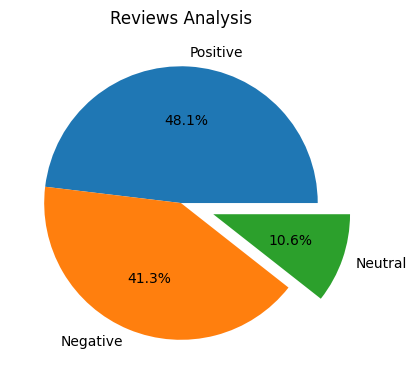

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)


In [ ]:
%pip install waterfallcharts
%pip install waterfall-ax
import waterfall_chart
from waterfall_ax import WaterfallChart
import plotly.graph_objects as go

  Preparing metadata (setup.py) ... done
  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3388 sha256=5012bdfbd2e21886aee8b2518ec0c2200486f08b6915c94f65cf8c1291dcf573
  Stored in directory: /root/.cache/pip/wheels/bd/34/6c/58fce34a3b8ec5607aff650db14ceb41db8223ac217423371b
Successfully built waterfallcharts


# **Wordcloud**

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

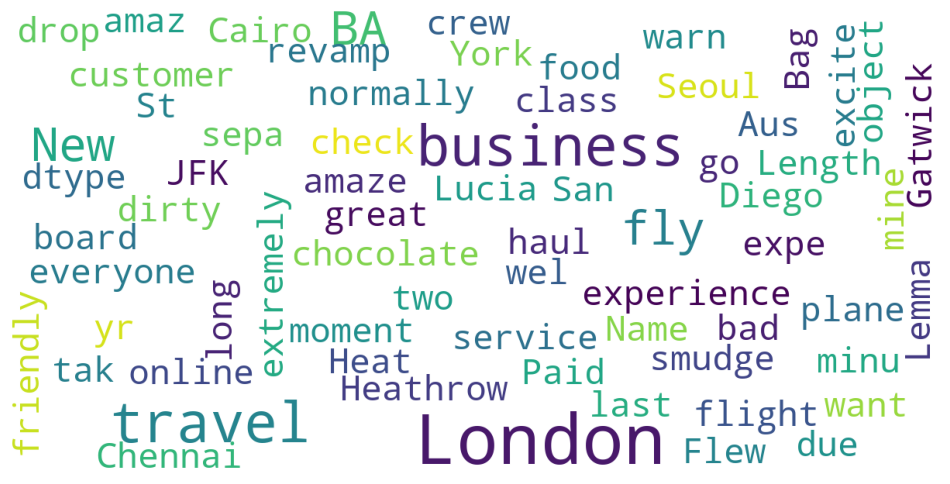

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data.Lemma)

In [ ]:
data.to_csv("data/BA_reviews_analyzed.csv")

**DIFFERENT WAY**

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import pos_tag
import re

# Load the data
data = pd.read_csv("data/BA_reviews.csv", index_col=0)

# Display the first few rows of the DataFrame
print("Original Data:")
print(data.head())

# Cleaning the text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Replace special characters with a space
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    # Replace HTML line breaks with a space
    text = text.replace("<br />", " ")

    # Add more cleaning steps if necessary
    return text

data['cleaned_reviews'] = data['reviews'].apply(clean_text)

# Tokenization
data['tokens'] = data['cleaned_reviews'].apply(word_tokenize)

# Enrichment – POS tagging
data['pos_tags'] = data['tokens'].apply(pos_tag)

# Stopwords removal
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

data['filtered_tokens'] = data['tokens'].apply(remove_stopwords)

# Obtaining the stem words
stemmer = PorterStemmer()

def get_stems(tokens):
    return [stemmer.stem(word) for word in tokens]

data['stem_words'] = data['filtered_tokens'].apply(get_stems)

# Display the cleaned and processed data
print("\nProcessed Data:")
print(data[['cleaned_reviews', 'tokens', 'pos_tags', 'filtered_tokens', 'stem_words']].head())


Original Data:
                                             reviews
0  ✅ Trip Verified | Not a great experience. I co...
1  Not Verified | I was excited to fly BA as I'd ...
2  Not Verified |  I just want to warn everyone o...
3  Not Verified | Paid for business class travell...
4  ✅ Trip Verified |  The plane was extremely dir...

Processed Data:
                                     cleaned_reviews  \
0    trip verified   not a great experience  i co...   
1  not verified   i was excited to fly ba as i d ...   
2  not verified    i just want to warn everyone o...   
3  not verified   paid for business class travell...   
4    trip verified    the plane was extremely dir...   

                                              tokens  \
0  [trip, verified, not, a, great, experience, i,...   
1  [not, verified, i, was, excited, to, fly, ba, ...   
2  [not, verified, i, just, want, to, warn, every...   
3  [not, verified, paid, for, business, class, tr...   
4  [trip, verified, the, plane, w

In [ ]:
from  vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Instantiate the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis and create columns for positive, negative, neutral scores
data['compound'] = data['cleaned_reviews'].apply(lambda x: sid.polarity_scores(x)['compound'])
data['positive'] = data['cleaned_reviews'].apply(lambda x: sid.polarity_scores(x)['pos'])
data['negative'] = data['cleaned_reviews'].apply(lambda x: sid.polarity_scores(x)['neg'])
data['neutral'] = data['cleaned_reviews'].apply(lambda x: sid.polarity_scores(x)['neu'])

# Display the sentiment analysis results
print("\nSentiment Analysis Results:")
print(data[['cleaned_reviews', 'compound', 'positive', 'negative', 'neutral']].head())


Sentiment Analysis Results:
                                     cleaned_reviews  compound  positive  \
0    trip verified   not a great experience  i co...    0.8659     0.119   
1  not verified   i was excited to fly ba as i d ...    0.4744     0.085   
2  not verified    i just want to warn everyone o...   -0.8645     0.036   
3  not verified   paid for business class travell...   -0.9809     0.000   
4    trip verified    the plane was extremely dir...   -0.9127     0.041   

   negative  neutral  
0     0.058    0.823  
1     0.077    0.838  
2     0.054    0.911  
3     0.271    0.729  
4     0.118    0.842  


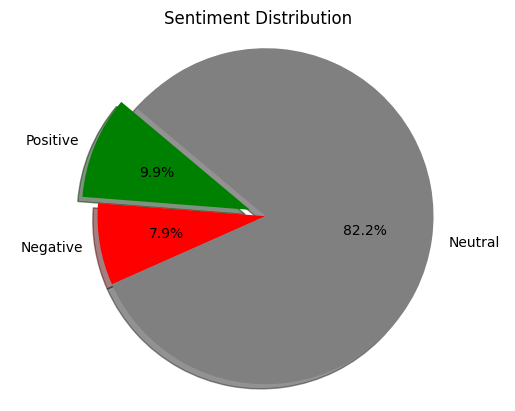

In [ ]:
import matplotlib.pyplot as plt

# Visual representation using matplotlib - Pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [
    data['positive'].mean(),
    data['negative'].mean(),
    data['neutral'].mean()
]

colors = ['green', 'red', 'gray']
explode = (0.1, 0, 0)  # explode 1st slice (i.e., Positive)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()